# CRISP DM

In [ ]:
Bussines Understanding

- Problem
Reservasi hotel online telah secara dramatis mengubah kemungkinan pemesanan dan perilaku pelanggan.
Sejumlah besar reservasi hotel dibatalkan karena pembatalan atau ketidakhadiran. Alasan umum pembatalan
termasuk perubahan rencana, konflik penjadwalan, dll.

- Tujuan
Dataset ini diambil dari Kaggle (https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset)
bertujuan untuk menganalisis dan memprediksi apakah pelanggan hotel akan membatalkan reservasinya atau tidak.


In [ ]:
Data Understanding

Berikut atribut-atribut dari dataset ini :

0. Booking_ID = ID pemesanan (objek) 
1. no_of_adults = Jumlah orang dewasa (int64)  
2. no_of_children = Jumlah anak kecil (int64)  
3. no_of_weekend_nights = Jumlah malam yang dipesan di akhir pekan (int64)  
4. no_of_week_nights = Jumlah malam yang dipesan di akhir pekan (int64)  
5. type_of_meal_plan = Jenis paket makan yang dipesan oleh tamu (objek) 
6. required_car_parking_space = Pemesanan tempat parkir mobil (int64)  
7. room_type_reserved = Tipe kamar yang dipesan (objek)
8. lead_time = Jumlah hari antara tanggal pemesanan dan tanggal kedatangan (int64)  
9. arrival_year = Tahun kedatangan (int64)  
10. arrival_month = Bulan kedatangan (int64)  
11. arrival_date = Tangga kedatangan (int64)  
12. market_segment_type = Tempat pemesanan (via pesanan) (objek) 
13. repeated_guest = Apakah tamu telah memesan sebelumnya? (int64)  
14. no_of_previous_cancellations = Jumlah pesanan yang dibatalkan sebelum pemesanan sekarang(int64)  
15. no_of_previous_bookings_not_canceled = Jumlah pesanan yang tidak dibatalkan sebelum pemesanan sekarang(int64)  
16. avg_price_per_room = Harga rata-rata kamar per hari (float64)
17. no_of_special_requests = Jumlah permintaan khusus yang dibuat oleh tamu (int64)  
18. booking_status = status pemesanan apakah dibatalkan atau tidak dibatalkan (objek)  

In [ ]:
Data Preparation

Yang menjadi fitur dalam dataset ini adalah:
1. no_of_adults
2. no_of_children
3. no_of_weekend_nights
4. no_of_week_nights
5. type_of_meal_plan
6. room_type_reserved
7. lead_time  
8. market_segment_type
9. repeated_guest
10. no_of_previous_cancellations
11. no_of_previous_bookings_not_canceled
12. avg_price_per_room
13. no_of_special_requests

Sedangkan, yang menjadi target adalah booking_status

In [ ]:
Modeling

Model yang digunakan yaitu Decision Tree Classifier atau pohon keputusan

In [ ]:
Evaluation

Evaluasi dilakukan dengan menguji model yang telah dipilih apakah sesuai dengan dataset yang
digunakan atau tidak. Evaluasi juga dilakukan dengan cara menguji data testing dengan data 
training.

In [ ]:
Deployment

Deployment dilakukan dengan menggunakan GitHub sebagai tempat menyimpan source code yang telah
dibuat dan Streamlit Share untuk mengaplikasikan source code yang telah diunggah di GitHub

# Import library

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import  train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Hotel Reservations.csv")

In [3]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [5]:
independen = [col for col in df.columns != 'booking_status']
defenden = 'booking_status'

# Transformasi Data

In [6]:
# memisahkan numerik dan kategori
numerik = []
kategori = []

for col in df.columns:
    if df[col].dtype == 'float64':
        numerik.append(col)
    elif df[col].dtype == 'int64':
        numerik.append(col)
    else:
        kategori.append(col)

for col in df.columns:
    if col in numerik:
        df[col].fillna(df[col].median(), inplace=True)
    else:
        df[col].fillna(df[col].mode()[0], inplace=True)

In [7]:
numerik

['no_of_adults',
 'no_of_children',
 'no_of_weekend_nights',
 'no_of_week_nights',
 'required_car_parking_space',
 'lead_time',
 'arrival_year',
 'arrival_month',
 'arrival_date',
 'repeated_guest',
 'no_of_previous_cancellations',
 'no_of_previous_bookings_not_canceled',
 'avg_price_per_room',
 'no_of_special_requests']

In [8]:
kategori

['Booking_ID',
 'type_of_meal_plan',
 'room_type_reserved',
 'market_segment_type',
 'booking_status']

In [9]:
df['booking_status'].value_counts()

booking_status
Not_Canceled    24390
Canceled        11885
Name: count, dtype: int64

In [10]:
df['type_of_meal_plan'].value_counts()

type_of_meal_plan
Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: count, dtype: int64

In [11]:
df['room_type_reserved'].value_counts()

room_type_reserved
Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: count, dtype: int64

In [12]:
df['market_segment_type'].value_counts()

market_segment_type
Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: count, dtype: int64

In [13]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in kategori:
    df[col] = le.fit_transform(df[col])

In [14]:
df['booking_status'] = le.fit_transform(df['booking_status'])

In [15]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,0,2,0,1,2,0,0,0,224,2017,10,2,3,0,0,0,65.00,0,1
1,1,2,0,2,3,3,0,0,5,2018,11,6,4,0,0,0,106.68,1,1
2,2,1,0,2,1,0,0,0,1,2018,2,28,4,0,0,0,60.00,0,0
3,3,2,0,0,2,0,0,0,211,2018,5,20,4,0,0,0,100.00,0,0
4,4,2,0,1,1,3,0,0,48,2018,4,11,4,0,0,0,94.50,0,0


In [16]:
df.to_csv('hotel.csv')

In [17]:
df['booking_status'].value_counts()

booking_status
1    24390
0    11885
Name: count, dtype: int64

# Split data

In [37]:
X = df.drop(columns=['booking_status', 'Booking_ID', 'arrival_year',
                     'arrival_month', 'arrival_date', 'required_car_parking_space'], axis=1)
Y = df['booking_status']

In [38]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [39]:
print(X.shape, x_train.shape, x_test.shape)

(36275, 13) (29020, 13) (7255, 13)


# Membuat model training

In [40]:
desicion = DecisionTreeClassifier(
    ccp_alpha=0.0, class_weight=None, criterion='entropy',
    max_depth=4, max_features=None, max_leaf_nodes=None,
    min_impurity_decrease=0.0, min_samples_leaf=1,
    min_samples_split=2, min_weight_fraction_leaf=0.0,
    random_state=42, splitter='best'
)

In [41]:
model = desicion.fit(x_train, y_train)

# Evaluasi model

In [42]:
x_train_predict = model.predict(x_train)
training_data_accuracy = accuracy_score(x_train_predict, y_train)

In [43]:
print('Akurasi data training : ', training_data_accuracy)

Akurasi data training :  0.8162646450723638


In [44]:
x_test_predict = model.predict(x_test)
test_data_accuracy = accuracy_score(x_test_predict, y_test)

In [45]:
print('Akurasi data testing : ', test_data_accuracy)

Akurasi data testing :  0.8159889731219848


# Visualisasi Data

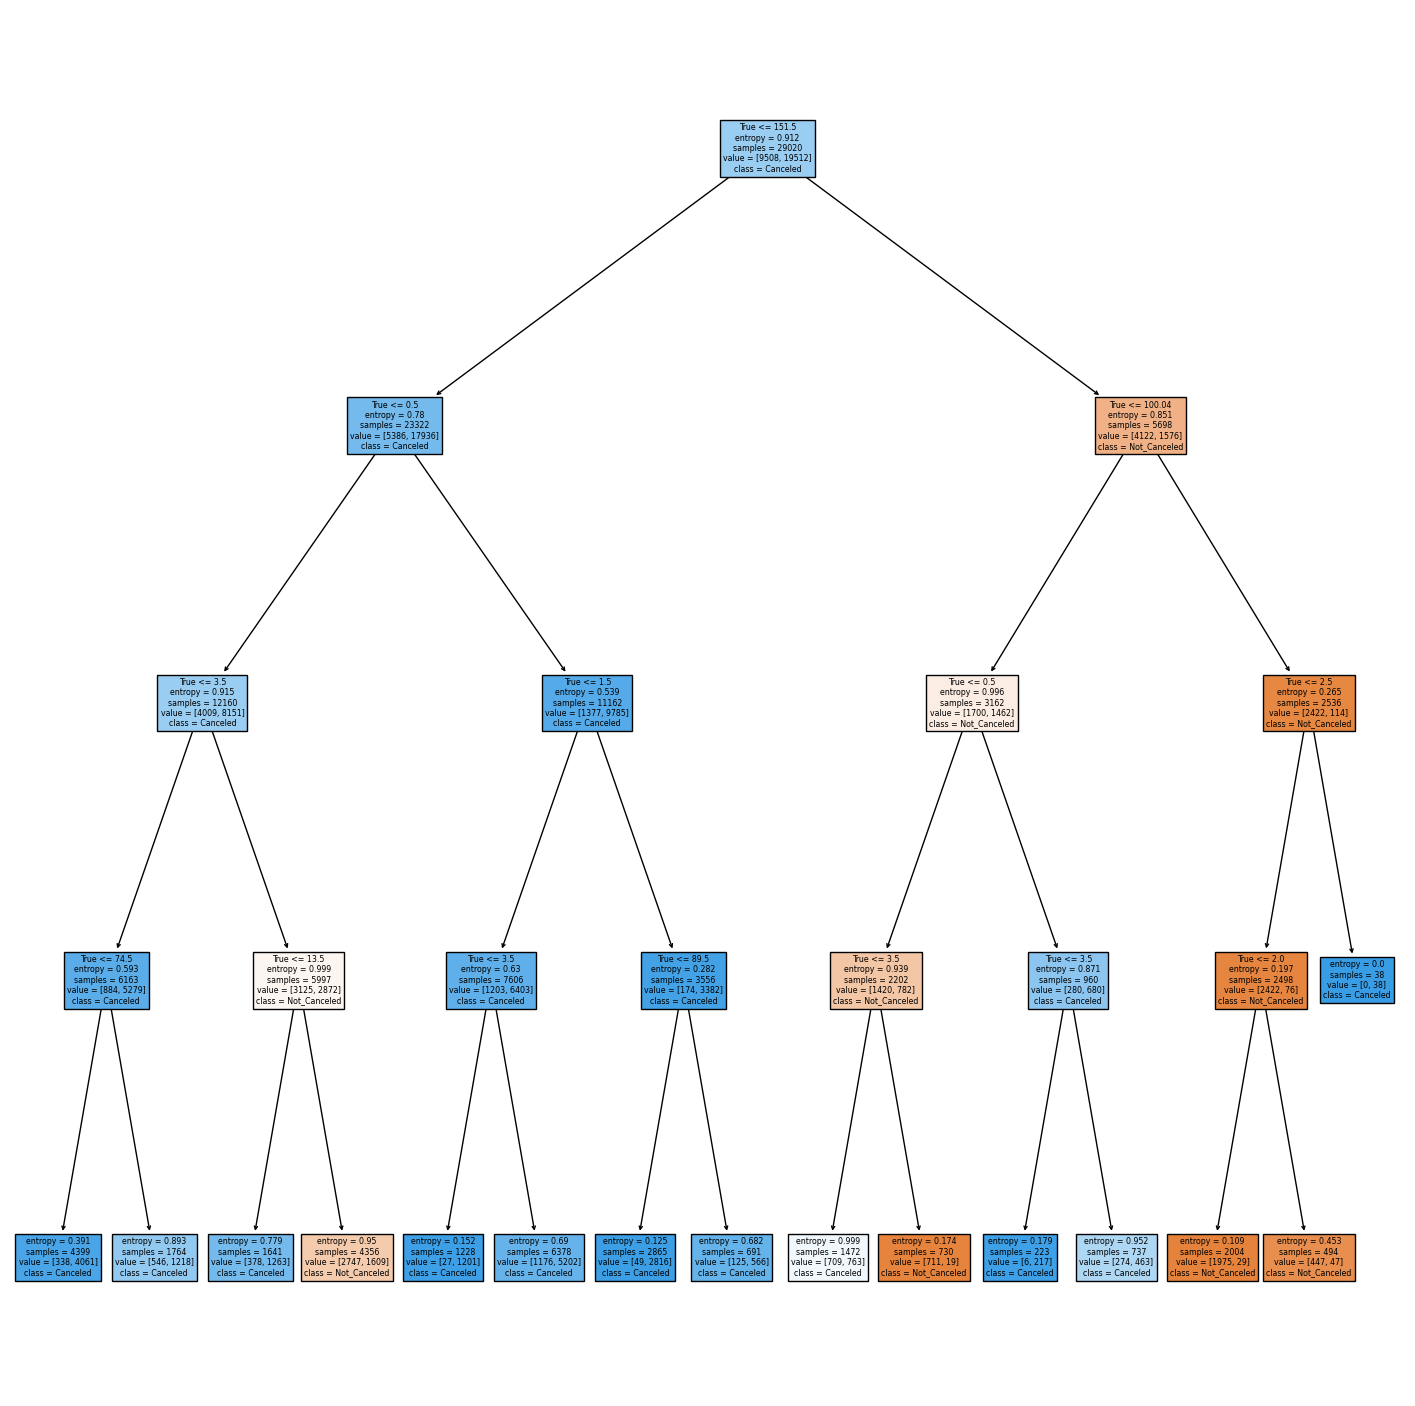

In [46]:
fig = plt.figure(figsize=(18, 18))
_ = tree.plot_tree(
    model,
    feature_names = independen,
    class_names = ['Not_Canceled', 'Canceled'],
    filled = True)

# Model Prediksi

In [47]:
input_data = (2, 0, 0, 2, 0, 0, 211, 4, 0, 0, 0, 100.0, 0)
input_data_numpy = np.asarray(input_data)
data_reshaped = input_data_numpy.reshape(1, -1)
prediksi = model.predict(data_reshaped)
print(prediksi)

if (prediksi[0] == 0):
    print('Pemesanan Hotel Dibatalkan')
else:
    print('Pemesanan Hotel Tidak Dibatalkan')

[0]
Pemesanan Hotel Dibatalkan


c:\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# Save Model

In [48]:
import pickle

filename = 'reservasi_hotel.sav'
pickle.dump(model, open(filename, 'wb'))